In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = time.time()
print('Loading the dataset')
data = pd.read_csv('clean_dataset_3.csv', sep=';', encoding='utf-8')
print('Dataset loaded! It took me {} esconds to get the job done!'.format(time.time() - start))

Loading the dataset
Dataset loaded! It took me 52.98475122451782 esconds to get the job done!


In [3]:
# Remove false first column
data = data.ix[:, 1:]
del data['unit_seat_price_eur.1']
# Create X and y objects
X = data.ix[:, :-1]
y = data['target']

Balance the data

In [4]:
# Index of positive and negative data
index_positive = list(y[y == 1].index)
index_negative = list(y[y == 0].index)
# Sample over the negative data
index_negative_sample = list(y[index_negative].sample(y.value_counts()[1]).index)
index_final = index_negative_sample + index_positive
# Produce the final features and target variable to use for the learning part.
y = y[index_final]
X = X.ix[index_final]

In [18]:
X.shape

(887826, 154)

# Full Batch Training

In [19]:
from sklearn.model_selection import train_test_split
# We split the data into train and test data. Here we keep 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# We define here the metrics that we will use
def accuracy(predicted, true):
    return (predicted == true).sum() / len(true)
def precision(predicted, true):
    numerator = ((predicted == true) & (true == 1)).sum()
    denominator = ((predicted == true) & (true == 1)).sum() + ((predicted != true) & (true == 0)).sum()
    return numerator / denominator
def recall(predicted, true):
    numerator = ((predicted == true) & (true == 1)).sum()
    denominator = ((predicted == true) & (true == 1)).sum() + ((predicted != true) & (true == 1)).sum()
    return numerator / denominator    
def f1_score(predicted, true):
    a = precision(predicted, true)
    b = recall(predicted, true)
    return 2 * (a*b)/(a+b)

In [13]:
from random import randint
pred = [randint(0, 1) for i in range(len(y_test))]

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Accuracy = 0.49776609724
Precision = 0.498676147969
Recall = 0.494078848748
F1_score = 0.496366853658


#### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
import time

model_log = LogisticRegression()

start = time.clock()
print('Start training')
model_log.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_log.predict(X_test)

Start training
Training done!
The algorithms ran for 57.01458803209323 seconds


In [23]:
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Accuracy = 0.673506089777
Precision = 0.701044113808
Recall = 0.605010024555
F1_score = 0.64949637852


In [14]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
class_names = data.target.unique()
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.39  0.61]]


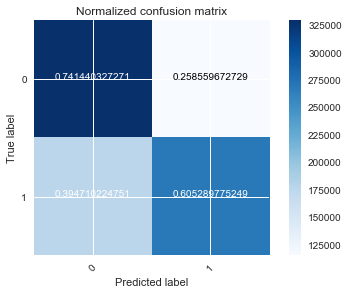

In [25]:
pred = model_log.predict(X)

cnf_matrix = confusion_matrix(y, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
print("Accuracy =", accuracy(pred, y))
print("Precision =", precision(pred, y))
print("Recall =", recall(pred, y))
print("F1_score =", f1_score(pred, y))

Accuracy = 0.67336505126
Precision = 0.700688964571
Recall = 0.605289775249
F1_score = 0.649505007935


#### Descision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
import time

model_tree = DecisionTreeClassifier(class_weight='balanced')

start = time.clock()
print('Start training')
model_tree.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_tree.predict(X_test)

Start training
Training done!
The algorithms ran for 51.22591064583435 seconds


Accuracy = 0.62066169072
Precision = 0.621998162644
Recall = 0.615169741614
F1_score = 0.618565107745
Normalized confusion matrix
[[ 0.63  0.37]
 [ 0.38  0.62]]


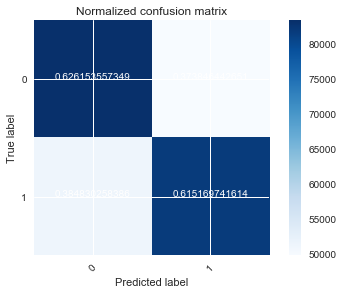

In [29]:
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.39  0.61]]


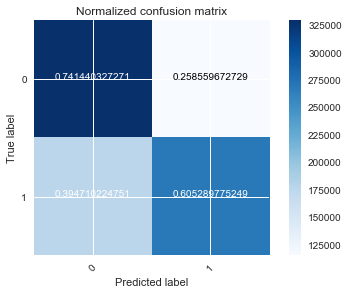

Accuracy = 0.67336505126
Precision = 0.700688964571
Recall = 0.605289775249
F1_score = 0.649505007935


In [30]:
pred = model_tree.predict(X)

cnf_matrix = confusion_matrix(y, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print("Accuracy =", accuracy(pred, y))
print("Precision =", precision(pred, y))
print("Recall =", recall(pred, y))
print("F1_score =", f1_score(pred, y))

#### Random Forest

Start training
Training done!
The algorithms ran for 37.950477095731 seconds
Accuracy = 0.687949599772
Precision = 0.689343450008
Recall = 0.684260323038
F1_score = 0.686792481271
Normalized confusion matrix
[[ 0.69  0.31]
 [ 0.32  0.68]]


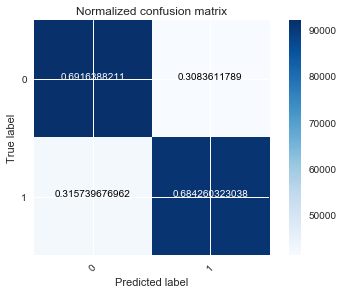

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=40, n_jobs=-1, class_weight='balanced')

start = time.clock()
print('Start training')
model_rf.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_rf.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.09  0.91]]


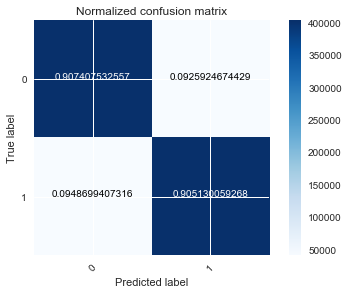

Accuracy = 0.906268795913
Precision = 0.907196174323
Recall = 0.905130059268
F1_score = 0.906161939074


In [37]:
pred = model_rf.predict(X)

cnf_matrix = confusion_matrix(y, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print("Accuracy =", accuracy(pred, y))
print("Precision =", precision(pred, y))
print("Recall =", recall(pred, y))
print("F1_score =", f1_score(pred, y))

#### Gradient Boosting

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

start = time.clock()
print('Start training')
model_gb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_gb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
pred = model_gb.predict(X)

cnf_matrix = confusion_matrix(y, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print("Accuracy =", accuracy(pred, y))
print("Precision =", precision(pred, y))
print("Recall =", recall(pred, y))
print("F1_score =", f1_score(pred, y))

#### XGBoost

In [ ]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(learning_rate=0.2, gamma=0.1)

start = time.clock()
print('Start training')
model_xgb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_xgb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
pred = model_xgb.predict(X)

cnf_matrix = confusion_matrix(y, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

print("Accuracy =", accuracy(pred, y))
print("Precision =", precision(pred, y))
print("Recall =", recall(pred, y))
print("F1_score =", f1_score(pred, y))

#### Neural Nets

In [38]:
import numpy as np
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import to_categorical

# We transform the target variable
Y_train = to_categorical(y_train)
Y_train[:3]

Using TensorFlow backend.


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [39]:
# We transform the target variable
Y_train = to_categorical(y_train)
Y_train[:3]

from keras import initializations
def normal_init(shape, name=None):
    return initializations.normal(shape, scale=0.1, name=name)

N = np.array(X_train).shape[1]
H = 100
K = 2
# Build the neural network
model = Sequential()
model.add(Dense(H, input_dim=N, init=normal_init))
keras.layers.core.Dropout(0.8)
model.add(Activation("sigmoid"))
model.add(Dense(K))
model.add(Activation("softmax"))
# Compile it with a good optimizer
model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
history = model.fit(np.array(X_train), np.array(Y_train), nb_epoch=15, batch_size=32)

Epoch 1/15


InternalError: Blas SGEMM launch failed : a.shape=(32, 154), b.shape=(154, 100), m=32, n=100, k=154
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]
	 [[Node: mul_2/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_580_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'MatMul', defined at:
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-85dfc831f29b>", line 10, in <module>
    model.add(Dense(H, input_dim=N, init=normal_init))
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\models.py", line 294, in add
    layer.create_input_layer(batch_input_shape, input_dtype)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 398, in create_input_layer
    self(x)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 569, in __call__
    self.add_inbound_node(inbound_layers, node_indices, tensor_indices)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 632, in add_inbound_node
    Node.create_node(self, inbound_layers, node_indices, tensor_indices)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\engine\topology.py", line 164, in create_node
    output_tensors = to_list(outbound_layer.call(input_tensors[0], mask=input_masks[0]))
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\layers\core.py", line 768, in call
    output = K.dot(x, self.W)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\keras\backend\tensorflow_backend.py", line 807, in dot
    out = tf.matmul(x, y)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1729, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1442, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InternalError (see above for traceback): Blas SGEMM launch failed : a.shape=(32, 154), b.shape=(154, 100), m=32, n=100, k=154
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_dense_input_1_0/_9, dense_1_W/read)]]
	 [[Node: mul_2/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_580_mul_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Error on the train set at each epoch')
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Error on the train set at each epoch')
plt.show()

#### Working on a mini batch

In [5]:
N = int(len(X) / 10)
a = list(X.sample(N).index)
X = X.ix[a]
y = y[a]

In [9]:
from sklearn.model_selection import train_test_split
# We split the data into train and test data. Here we keep 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Logistic Regression

Start training
Training done!
The algorithms ran for 7.784697144062648 seconds
Accuracy = 0.66821850948
Precision = 0.694937256599
Recall = 0.601858791785
F1_score = 0.645057637466
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.4   0.6 ]]


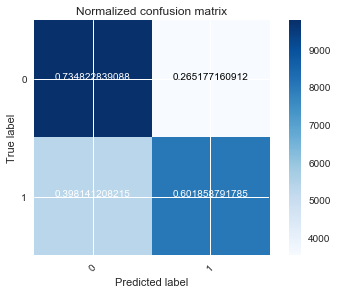

In [15]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(C=0.1)

start = time.clock()
print('Start training')
model_log.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_log.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.74  0.26]
 [ 0.39  0.61]]


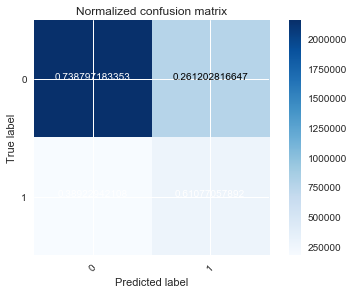

Accuracy = 0.721889148248
Precision = 0.26242844726
Recall = 0.61077057892
F1_score = 0.367118079275


In [33]:
pred = model_log.predict(data.ix[:, :-1])
a = data.target
cnf_matrix = confusion_matrix(a, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy =", accuracy(pred, a))
print("Precision =", precision(pred, a))
print("Recall =", recall(pred, a))
print("F1_score =", f1_score(pred, a))

#### Decision Tree

Start training
Training done!
The algorithms ran for 3.0201105934490897 seconds
Accuracy = 0.623690632626
Precision = 0.624037670977
Recall = 0.625768250637
F1_score = 0.624901762659
Normalized confusion matrix
[[ 0.62  0.38]
 [ 0.37  0.63]]


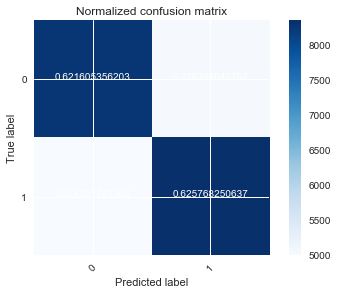

In [36]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(class_weight='balanced')

start = time.clock()
print('Start training')
model_tree.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_tree.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.63  0.37]
 [ 0.35  0.65]]


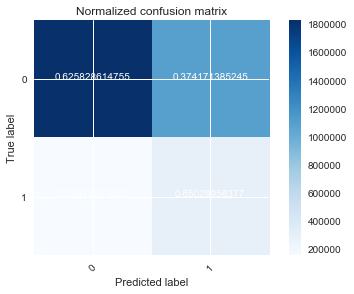

Accuracy = 0.629059091144
Precision = 0.209141992714
Recall = 0.65028958377
F1_score = 0.316494909222


In [37]:
pred = model_tree.predict(data.ix[:, :-1])
a = data.target
cnf_matrix = confusion_matrix(a, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy =", accuracy(pred, a))
print("Precision =", precision(pred, a))
print("Recall =", recall(pred, a))
print("F1_score =", f1_score(pred, a))

#### Random Forest

Start training
Training done!
The algorithms ran for 5.656787369733479 seconds
Accuracy = 0.683949690257
Precision = 0.673747353564
Recall = 0.715559886074
F1_score = 0.694024425705
Normalized confusion matrix
[[ 0.65  0.35]
 [ 0.28  0.72]]


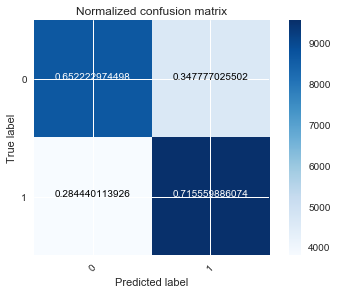

In [17]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')

start = time.clock()
print('Start training')
model_rf.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_rf.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.26  0.74]]


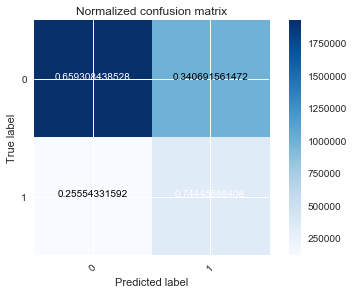

Accuracy = 0.670553675651
Precision = 0.249527898357
Recall = 0.74445668408
F1_score = 0.373773829249


In [32]:
pred = model_rf.predict(data.ix[:, :-1])
a = data.target
cnf_matrix = confusion_matrix(a, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy =", accuracy(pred, a))
print("Precision =", precision(pred, a))
print("Recall =", recall(pred, a))
print("F1_score =", f1_score(pred, a))

#### Gradient Boosting

Start training
Training done!
The algorithms ran for 33.40044001923158 seconds
Accuracy = 0.692885301295
Precision = 0.681504922644
Recall = 0.726352870634
F1_score = 0.703214570786
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.27  0.73]]


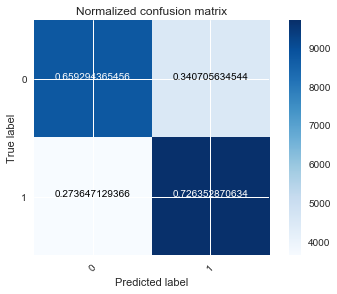

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

start = time.clock()
print('Start training')
model_gb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_gb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.67  0.33]
 [ 0.27  0.73]]


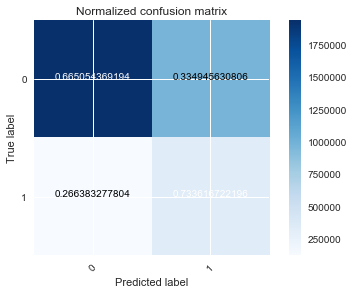

Accuracy = 0.674109164301
Precision = 0.249966610941
Recall = 0.733616722196
F1_score = 0.372880831952


In [31]:
pred = model_gb.predict(data.ix[:, :-1])
a = data.target
cnf_matrix = confusion_matrix(a, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy =", accuracy(pred, a))
print("Precision =", precision(pred, a))
print("Recall =", recall(pred, a))
print("F1_score =", f1_score(pred, a))

#### XGB

Start training


C:\Users\Peter martigny\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training done!
The algorithms ran for 6.8549840731053 seconds
Accuracy = 0.695062887179
Precision = 0.681780192227
Recall = 0.733698096237
F1_score = 0.70678700361
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.27  0.73]]


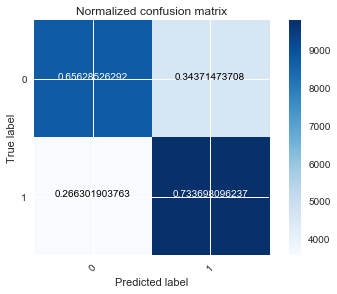

In [21]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(learning_rate=0.2, gamma=0.1)

start = time.clock()
print('Start training')
model_xgb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_xgb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.26  0.74]]


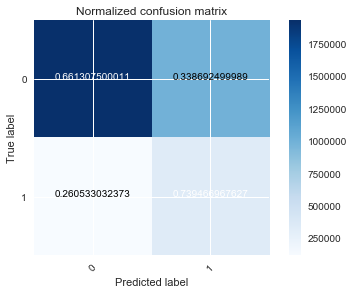

Accuracy = 0.671629753172
Precision = 0.249370608121
Recall = 0.739466967627
F1_score = 0.372965857943


In [30]:
pred = model_xgb.predict(data.ix[:, :-1])
a = data.target
cnf_matrix = confusion_matrix(a, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print("Accuracy =", accuracy(pred, a))
print("Precision =", precision(pred, a))
print("Recall =", recall(pred, a))
print("F1_score =", f1_score(pred, a))

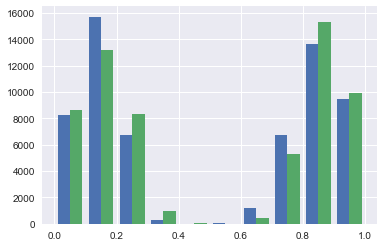

In [25]:
proba = model_rf.predict_proba(X_train)

plt.hist(proba)
plt.show()

#### Misceallenous

In [11]:
coefficients = model_log.coef_[0]
ind = X.columns

a = pd.DataFrame(coefficients)
a.columns = ['coefs']
b = pd.DataFrame(ind)
a = pd.concat((b, a), axis=1)
best = a.sort_values(by='coefs', ascending=False)
worst = a.sort_values(by='coefs', ascending=True)

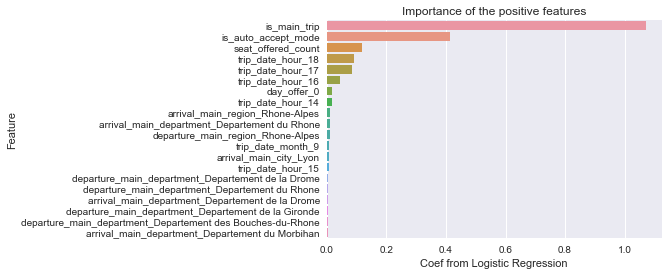

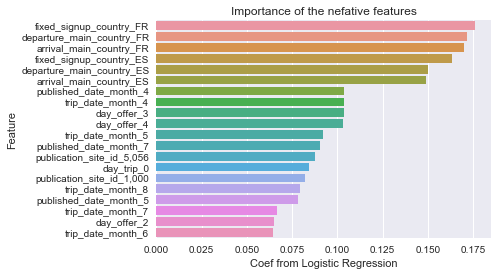

In [12]:
sns.barplot(x=best['coefs'][:20], y=best[0][:20])
plt.title('Importance of the positive features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

sns.barplot(x=-worst['coefs'][:20], y=worst[0][:20])
plt.title('Importance of the nefative features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

In [13]:
(X['unit_seat_price_eur'] / X['trip_distance_km']).describe()

count    887826.000000
mean          0.504770
std           5.848848
min           0.000000
25%           0.071351
50%           0.079200
75%           0.084076
max         128.133257
dtype: float64

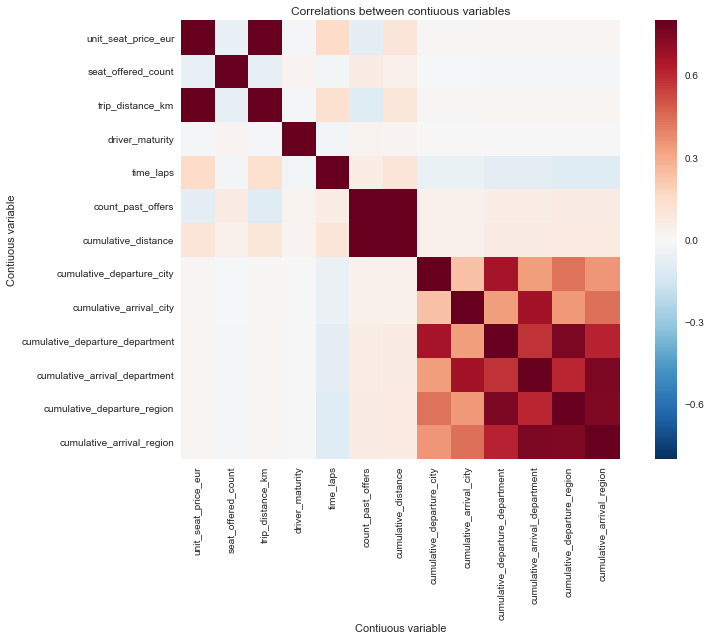

In [14]:
continuous_features = ['unit_seat_price_eur', 'seat_offered_count', 'trip_distance_km', 
                       'driver_maturity', 'time_laps', 'count_past_offers', 'cumulative_distance',
                      'cumulative_departure_city', 
                       'cumulative_arrival_city', 'cumulative_departure_department',
                      'cumulative_arrival_department', 'cumulative_departure_region',
                      'cumulative_arrival_region']

corrmat = X[continuous_features].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.xlabel('Contiuous variable')
plt.ylabel('Contiuous variable')
plt.title('Correlations between contiuous variables')
f.tight_layout()

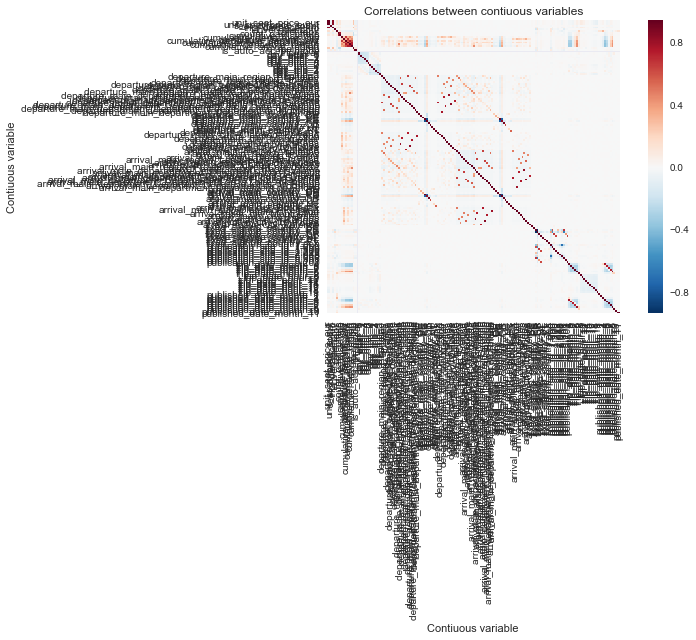

In [15]:
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.xlabel('Contiuous variable')
plt.ylabel('Contiuous variable')
plt.title('Correlations between contiuous variables')
f.tight_layout()

#### Only with continuous features

Start training
Training done!
The algorithms ran for 39.48144949613868 seconds
Accuracy = 0.645039572289
Precision = 0.649919654709
Recall = 0.628694581281
F1_score = 0.639130949246


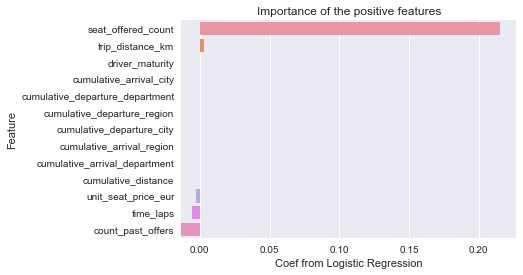

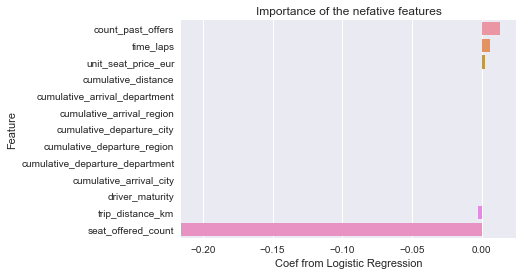

In [18]:
X = data[continuous_features]
y = data['target']

# Index of positive and negative data
index_positive = list(y[y == 1].index)
index_negative = list(y[y == 0].index)
# Sample over the negative data
index_negative_sample = list(y[index_negative].sample(y.value_counts()[1]).index)
index_final = index_negative_sample + index_positive
# Produce the final features and target variable to use for the learning part.
y = y[index_final]
X = X.ix[index_final]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_log = LogisticRegression()

start = time.clock()
print('Start training')
model_log.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_log.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

coefficients = model_log.coef_[0]
ind = X.columns

a = pd.DataFrame(coefficients)
a.columns = ['coefs']
b = pd.DataFrame(ind)
a = pd.concat((b, a), axis=1)
best = a.sort_values(by='coefs', ascending=False)
worst = a.sort_values(by='coefs', ascending=True)

sns.barplot(x=best['coefs'][:20], y=best[0][:20])
plt.title('Importance of the positive features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

sns.barplot(x=-worst['coefs'][:20], y=worst[0][:20])
plt.title('Importance of the nefative features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

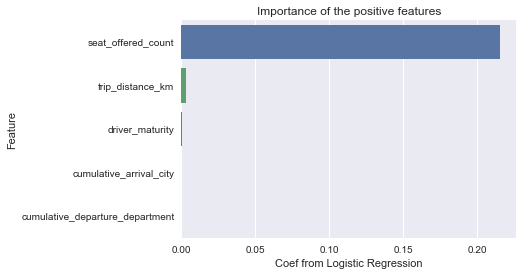

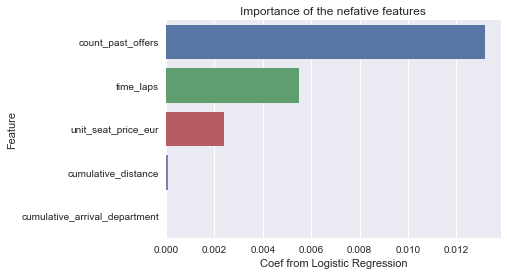

In [19]:
sns.barplot(x=best['coefs'][:5], y=best[0][:5])
plt.title('Importance of the positive features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

sns.barplot(x=-worst['coefs'][:5], y=worst[0][:5])
plt.title('Importance of the nefative features')
plt.ylabel('Feature')
plt.xlabel('Coef from Logistic Regression')
plt.show()

# Working on a mini batch

In [16]:
len(data)

3361282

In [48]:
N = int(len(X) / 10)
a = list(X.sample(N).index)
X = X.ix[a]
y = y[a]

In [49]:
X.shape

(88782, 155)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model_log = LogisticRegression(C=.1)

start = time.clock()
print('Start training')
model_log.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_log.predict(X_test)

Start training
Training done!
The algorithms ran for 1.5904094100469592 seconds


In [100]:
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Accuracy = 0.674976534635
Precision = 0.70461887715
Recall = 0.60476618705
F1_score = 0.650885187724


In [101]:
# Implement a 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
score_logistic = cross_val_score(model_log, X, y, cv=5)
print('The results of the 5-Fold cross validation is', score_logistic)
print("The mean score for 5-Fold cross validation is", score_logistic.mean())

The results of the 5-Fold cross validation is [ 0.67792983  0.67162246  0.6788872   0.67650372  0.68059701]
The mean score for 5-Fold cross validation is 0.677108044126


#### Deep Learning

In [60]:
import numpy as np
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [61]:
# We transform the target variable
Y_train = to_categorical(y_train)
Y_train[:3]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [62]:
N = np.array(X_train).shape[1]
H = 100
K = 2

# Build the neural network
model = Sequential()
model.add(Dense(H, input_dim=N))
keras.layers.core.Dropout(0.8)
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

# Compile it with a good optimizer
model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])
# Fit the model
history = model.fit(np.array(X_train), np.array(Y_train), nb_epoch=15, batch_size=32)

Epoch 1/15
62147/62147 [==============================] - 11s - loss: 0.5881 - acc: 0.6795    
Epoch 2/15
62147/62147 [==============================] - 9s - loss: 0.5657 - acc: 0.6903     
Epoch 3/15
62147/62147 [==============================] - 10s - loss: 0.5575 - acc: 0.6970    
Epoch 4/15
62147/62147 [==============================] - 9s - loss: 0.5505 - acc: 0.7024     
Epoch 5/15
62147/62147 [==============================] - 10s - loss: 0.5446 - acc: 0.7056    
Epoch 6/15
62147/62147 [==============================] - 9s - loss: 0.5388 - acc: 0.7107     
Epoch 7/15
62147/62147 [==============================] - 10s - loss: 0.5330 - acc: 0.7152    
Epoch 8/15
62147/62147 [==============================] - 10s - loss: 0.5275 - acc: 0.7196    
Epoch 9/15
62147/62147 [==============================] - 10s - loss: 0.5218 - acc: 0.7241    
Epoch 10/15
62147/62147 [==============================] - 10s - loss: 0.5170 - acc: 0.7292    
Epoch 11/15
62147/62147 [========================

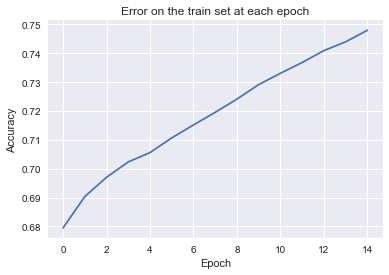

In [63]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Error on the train set at each epoch')
plt.show()

In [64]:
# And now test on the test set
predicted = model.predict_classes(np.array(X_test))
result = sum(predicted == y_test)/len(y_test)
print("\nAccuracy =", accuracy(predicted, y_test))
print("Precision =", precision(predicted, y_test))
print("Recall =", recall(predicted, y_test))
print("F1_score =", f1_score(predicted, y_test))

26496/26635 [============================>.] - ETA: 0s
Accuracy = 0.67752956636
Precision = 0.662560524067
Recall = 0.707335613835
F1_score = 0.684216331483


#### Gradient Boosting

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

start = time.clock()
print('Start training')
model_gb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_gb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Start training
Training done!
The algorithms ran for 32.15714594990936 seconds
Accuracy = 0.702384081096
Precision = 0.689173541757
Recall = 0.723907259597
F1_score = 0.706113520928


In [67]:
# With trees, we can have access to each variable's importance
def plot_features(model_features, initial_data, n):

    a = pd.DataFrame(model_features).sort_values(by=0, ascending = False)
    a.index = initial_data.columns
    a = a[:n]

    xs = np.arange(len(a))
    plt.barh(xs, a[0], align='center', alpha=1)
    plt.yticks(xs, a.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Which features contribute most to the predictions?')
    plt.gca().invert_yaxis()
    plt.show()

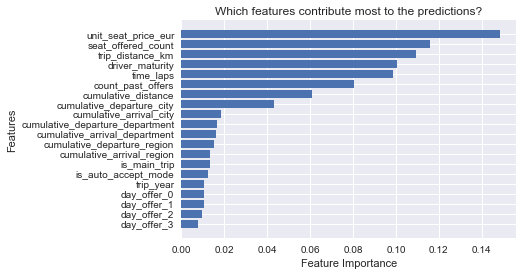

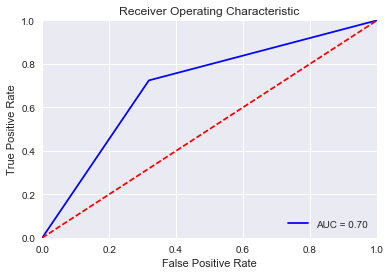

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plot_features(model_gb.feature_importances_, X, 20)

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Decision Tree

Start training
Training done!
The algorithms ran for 2.9727798733592863 seconds


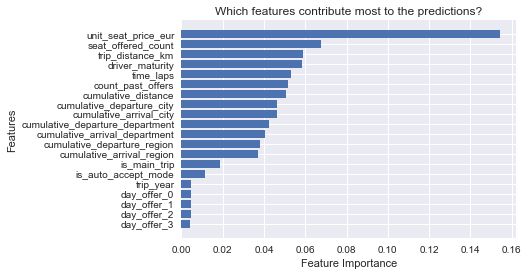

Accuracy = 0.620687065891
Precision = 0.625844529005
Recall = 0.603941846523
F1_score = 0.61469814271


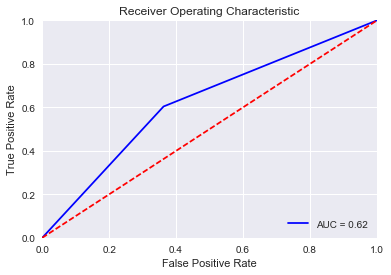

In [102]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(min_samples_split=5)

start = time.clock()
print('Start training')
model_tree.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_tree.predict(X_test)

plot_features(model_tree.feature_importances_, X, 20)
print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [103]:
score_tree = cross_val_score(model_tree, X, y, cv=5)
print('The results of the 5-Fold cross validation is', score_tree)
print("The mean score for 5-Fold cross validation is", score_tree.mean())

The results of the 5-Fold cross validation is [ 0.62448612  0.61992454  0.61823506  0.61810092  0.62343002]
The mean score for 5-Fold cross validation is 0.620835332105


#### Random Forest

Start training
Training done!
The algorithms ran for 4.920129643354812 seconds
Accuracy = 0.689468744134
Precision = 0.684405670665
Recall = 0.705485611511
F1_score = 0.694785785453


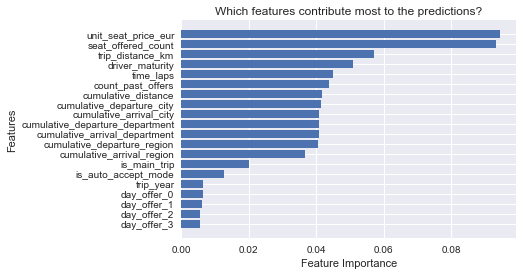

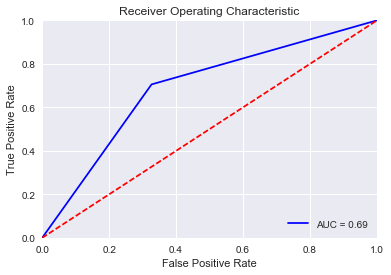

In [104]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=90, n_jobs=-1)

start = time.clock()
print('Start training')
model_rf.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_rf.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

plot_features(model_rf.feature_importances_, X, 20)

fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
score_rf = cross_val_score(model_rf, X, y, cv=5)
print('The results of the 5-Fold cross validation is', score_rf)
print("The mean score for 5-Fold cross validation is", score_rf.mean())

The results of the 5-Fold cross validation is [ 0.693473    0.68784141  0.69105142  0.689795    0.69586032]
The mean score for 5-Fold cross validation is 0.691604229494


#### XGBoost

In [106]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(learning_rate=0.2, gamma=0.1)

start = time.clock()
print('Start training')
model_xgb.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_xgb.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Start training
Training done!
The algorithms ran for 6.743703906208793 seconds
Accuracy = 0.698667167261
Precision = 0.688742191936
Recall = 0.727143285372
F1_score = 0.707421988918


In [107]:
score_xgb = cross_val_score(model_xgb, X, y, cv=5)
print('The results of the 5-Fold cross validation is', score_xgb)
print("The mean score for 5-Fold cross validation is", score_xgb.mean())

The results of the 5-Fold cross validation is [ 0.70186405  0.69961142  0.70304669  0.70190358  0.70430865]
The mean score for 5-Fold cross validation is 0.702146877523


In [132]:
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pca = PCA(n_components=60)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [135]:
model_rf = LogisticRegression()

start = time.clock()
print('Start training')
model_rf.fit(X_train, y_train)
print('Training done!')
print('The algorithms ran for {} seconds'.format(time.clock() - start))
pred = model_rf.predict(X_test)

print("Accuracy =", accuracy(pred, y_test))
print("Precision =", precision(pred, y_test))
print("Recall =", recall(pred, y_test))
print("F1_score =", f1_score(pred, y_test))

Start training
Training done!
The algorithms ran for 0.8822701177123236 seconds
Accuracy = 0.677679744697
Precision = 0.705938948657
Recall = 0.607115992177
F1_score = 0.652808670684


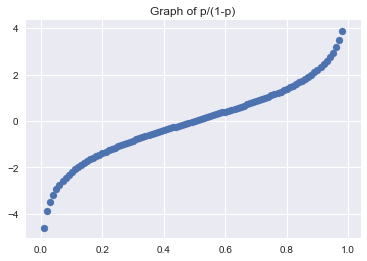

In [42]:
x = np.arange(0.01, 0.99, 0.01)
y = [np.log(a/(1-a)) for a in x]
plt.scatter(x, y)
plt.title('Graph of p/(1-p)')
plt.show()

$\Delta(Price)*\beta_{price} = \Delta log(\frac{P}{1 - P})$

$odd-ratio = e^{\Delta(Price) * \beta_{price}}$

$\Delta(Price) = \frac{\Delta log(\frac{P}{1 - P})}{\beta_{price}}$


$Loss(y, \hat y) = e^{\alpha (\hat y - y)} - \alpha (\hat y - y)$